# Analysis
## 1 - What indicators can be used to measure the efficiency of procurement by each of the partners? Which partners are the best, the worst according to these indicators?
We can use registrations, users_acqusition_costs, revenue_7_days to measure the efficiency.
According to plot (refer to plots)

# Import relevant modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
df = pd.read_csv('marketing_data-28347077.csv')
df.head()

,registration_date,traffic_type,id_partner,age_group,device,country_tier,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
0,2021-06-24,Google Search,1,35-,iOS,Tier_1,60,220.0,2.99,5,3,1
1,2021-09-13,Google Search,1,35-,MacOS,Tier_1,8,0.0,0.00,0,0,0
2,2021-07-12,Google Search,1,35-55,Android,Tier_1,121,2550.0,225.97,28,19,11
3,2021-03-26,Google Search,1,35-55,iOS,Tier_1,95,1900.0,351.92,23,9,2
4,2021-04-26,Google Search,1,35-,Android,Tier_1,51,915.0,256.09,7,2,2


# Data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48248 non-null  object 
 1   traffic_type            48248 non-null  object 
 2   id_partner              48248 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48248 non-null  object 
 5   country_tier            48248 non-null  object 
 6   registrations           48248 non-null  int64  
 7   users_acqusition_costs  48248 non-null  float64
 8   revenue_7_days          48248 non-null  float64
 9   logins_1_lt             48248 non-null  int64  
 10  logins_3_lt             48248 non-null  int64  
 11  logins_7_lt             48248 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.4+ MB


## Data cleaning

### Check missing values

In [5]:
df.isnull().values.any()

True

In [6]:
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum() 

print(f'Missing : {total_missing}')

Missing : 2


Lets find out where the missing values are.

In [7]:
columns_with_missing = df.isna().any()

columns_with_missing

registration_date         False
traffic_type              False
id_partner                False
age_group                  True
device                    False
country_tier              False
registrations             False
users_acqusition_costs    False
revenue_7_days            False
logins_1_lt               False
logins_3_lt               False
logins_7_lt               False
dtype: bool

### Handle missing values
Since there are only 2 missing values out of 48248 it's safe to delete entries with them.

In [8]:
df = df.dropna(subset=['age_group'])
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48246 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48246 non-null  object 
 1   traffic_type            48246 non-null  object 
 2   id_partner              48246 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48246 non-null  object 
 5   country_tier            48246 non-null  object 
 6   registrations           48246 non-null  int64  
 7   users_acqusition_costs  48246 non-null  float64
 8   revenue_7_days          48246 non-null  float64
 9   logins_1_lt             48246 non-null  int64  
 10  logins_3_lt             48246 non-null  int64  
 11  logins_7_lt             48246 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.8+ MB


## Data transformation

### Dates

In [10]:
#df['registration_date'] = pd.to_datetime(df['registration_date'])

### traffic_type transformation
Since we know that there are only 3 values for this column we can safely change its value to some numeric key.

In [11]:
unique_values = df['traffic_type'].unique()
unique_values

array(['Google Search', 'Facebook', 'Google Media'], dtype=object)

Replace values.

In [12]:
#df['traffic_type'] = df['traffic_type'].replace('Google Search', 0)
#df['traffic_type'] = df['traffic_type'].replace('Facebook', 1)
#df['traffic_type'] = df['traffic_type'].replace('Google Media', 2)
#df

# Data visualization and exploration

## Calculate the metrics by partner

In [25]:

partner_metrics = df.groupby('id_partner').agg({
    'registrations': 'sum',
    'users_acqusition_costs': 'sum',
    'revenue_7_days': 'sum',
    'logins_1_lt': 'sum',
    'logins_3_lt': 'sum',
    'logins_7_lt': 'sum'
})

partners_sorted_by_revenue = partner_metrics.sort_values('revenue_7_days', ascending=False)
partners_sorted_by_revenue


,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
id_partner,,,,,,
1,217271,5.205538e+06,1341136.700,43683,26299,17502
3,310841,4.246830e+06,870313.005,51691,31840,21103
4,431526,5.982619e+06,788895.900,70264,43043,28643
2,161962,4.877357e+06,525264.020,28294,16693,10847
6,837235,2.316403e+06,302755.920,103326,53881,32258
5,749426,1.989380e+06,170339.740,81951,41714,24342


### Revenue plot for partners

<Axes: xlabel='id_partner', ylabel='revenue_7_days'>

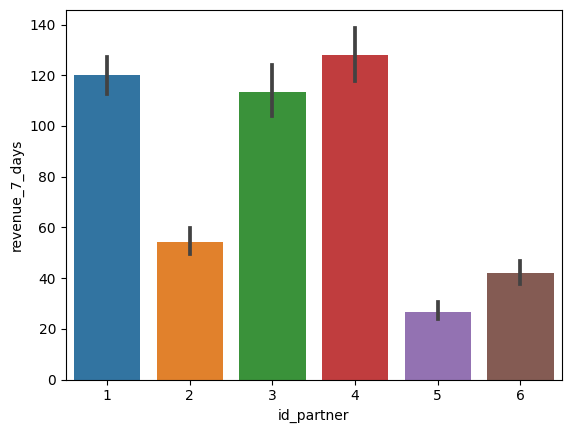

In [27]:
sns.barplot(data=df, x="id_partner", y="revenue_7_days")

In [31]:
partner_metrics['profit'] = partner_metrics['revenue_7_days'] - partner_metrics['users_acqusition_costs']
partners_sorted_by_profit = partner_metrics.sort_values('profit', ascending=False)
partners_sorted_by_profit


,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt,profit
id_partner,,,,,,,
5,749426,1.989380e+06,170339.740,81951,41714,24342,-1.819040e+06
6,837235,2.316403e+06,302755.920,103326,53881,32258,-2.013647e+06
3,310841,4.246830e+06,870313.005,51691,31840,21103,-3.376517e+06
1,217271,5.205538e+06,1341136.700,43683,26299,17502,-3.864401e+06
2,161962,4.877357e+06,525264.020,28294,16693,10847,-4.352093e+06
4,431526,5.982619e+06,788895.900,70264,43043,28643,-5.193723e+06


### Profit plot for partners

<Axes: xlabel='id_partner', ylabel='profit'>

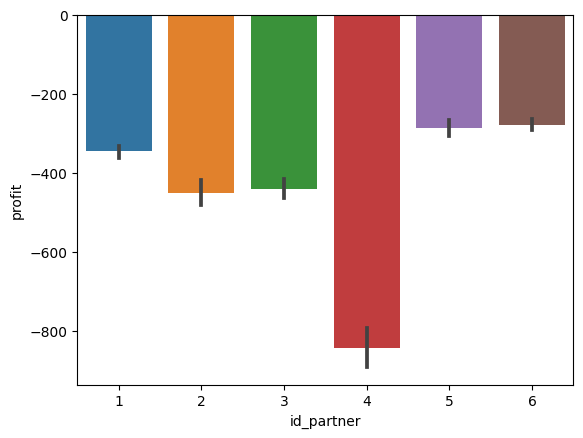

In [32]:
sns.barplot(data=df, x="id_partner", y="profit")

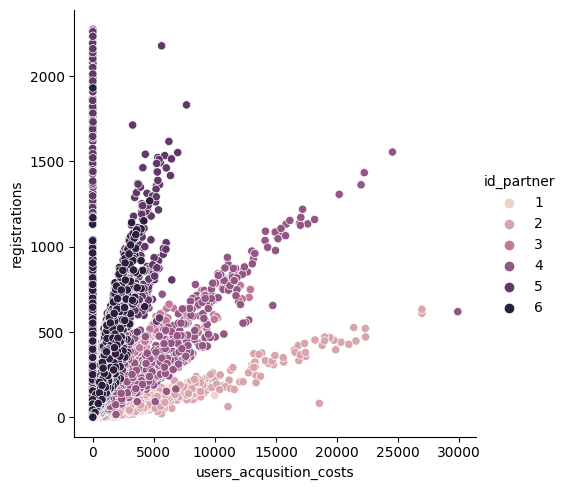

In [14]:
sns.relplot(data=df, y="registrations", x="users_acqusition_costs", hue="id_partner")

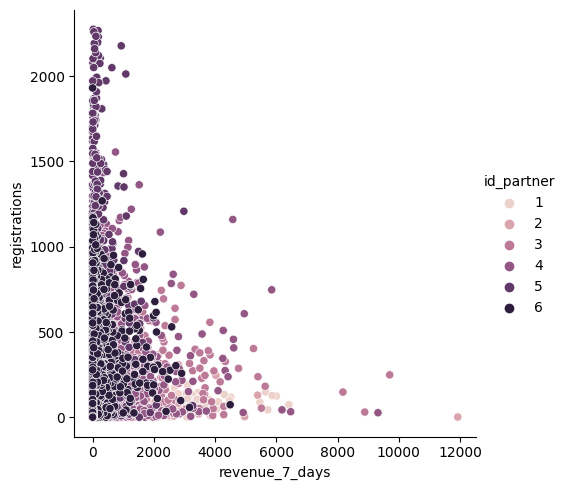

In [15]:
sns.relplot(data=df, y="registrations", x="revenue_7_days", hue="id_partner")

<Axes: xlabel='registrations', ylabel='profit'>

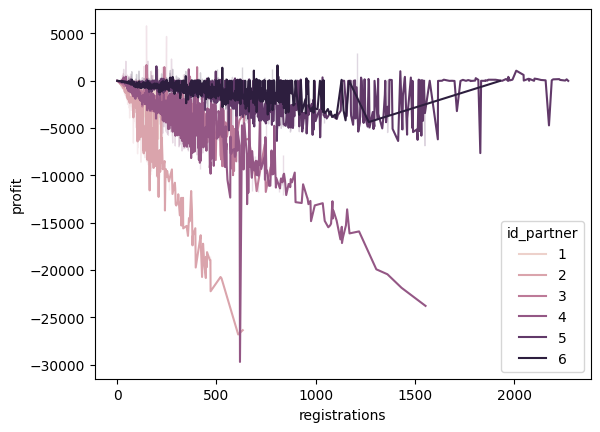

In [19]:
sns.lineplot(data=df, x="registrations", y="profit", hue="id_partner")

<Axes: ylabel='profit'>

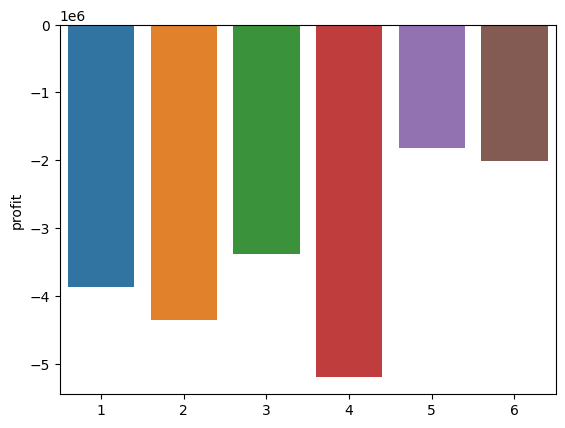

In [23]:
sum_by_category = df.groupby('id_partner')['profit'].sum()

sns.barplot(x=[1,2,3,4,5,6] , y=sum_by_category)

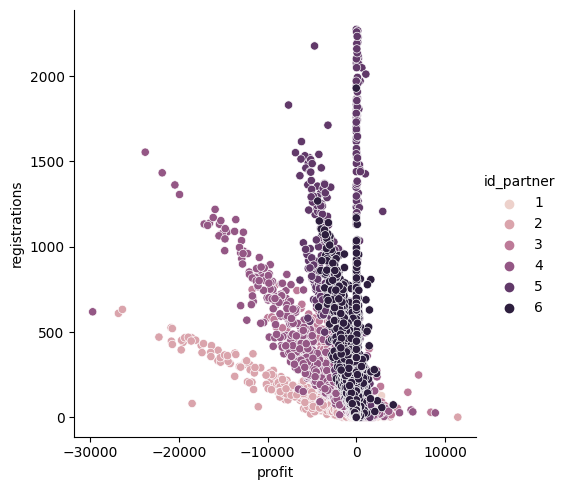

In [17]:
sns.relplot(data=df, y="registrations", x="profit", hue="id_partner")

In [16]:
sns.histplot(data=df, x="revenue_7_days", hue="id_partner")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1290cc310> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

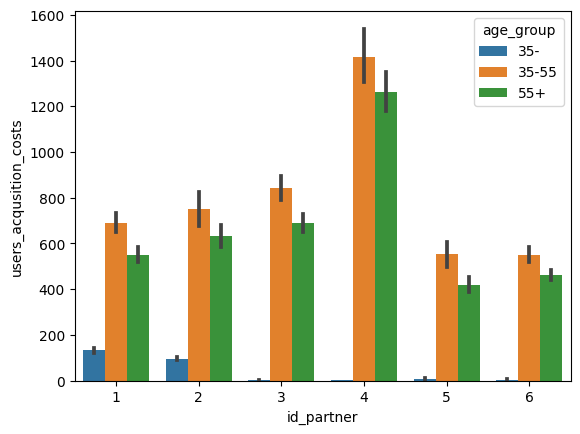

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="age_group")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

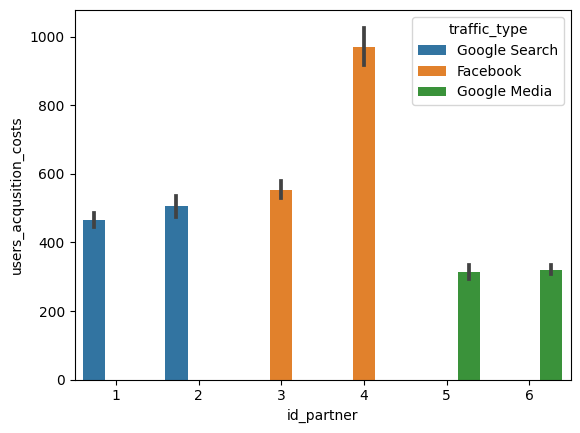

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="traffic_type")

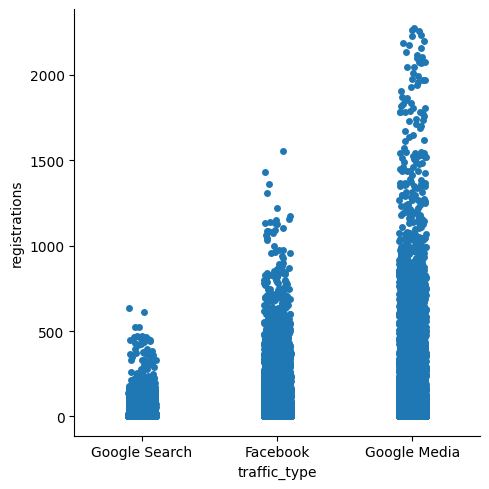

In [ ]:
sns.catplot(data=df, y="registrations", x="traffic_type")

<Axes: xlabel='age_group', ylabel='count'>

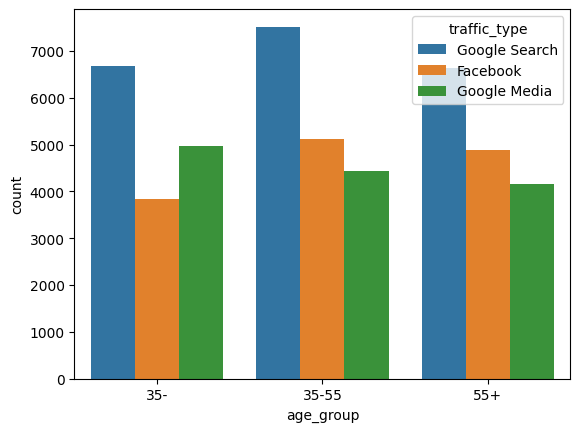

In [ ]:
sns.countplot(data=df, x="age_group", hue="traffic_type")

<Axes: xlabel='device', ylabel='count'>

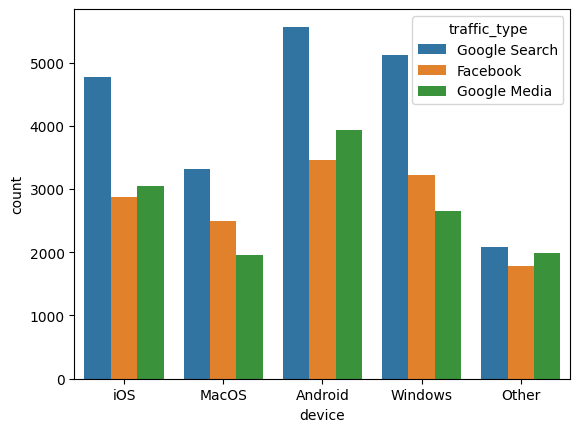

In [ ]:
sns.countplot(data=df, x="device", hue="traffic_type")

<Axes: xlabel='traffic_type', ylabel='registrations'>

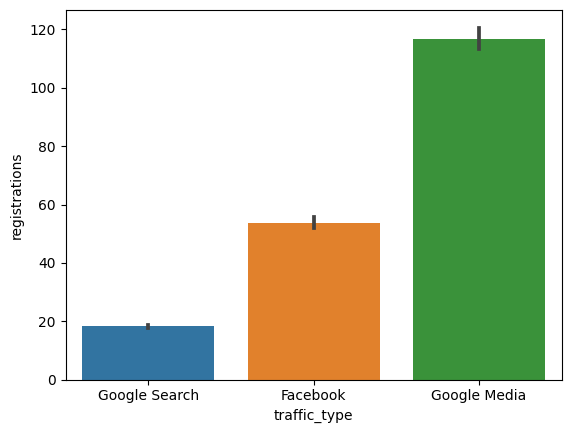

In [ ]:
sns.barplot(data=df, y="registrations", x="traffic_type")

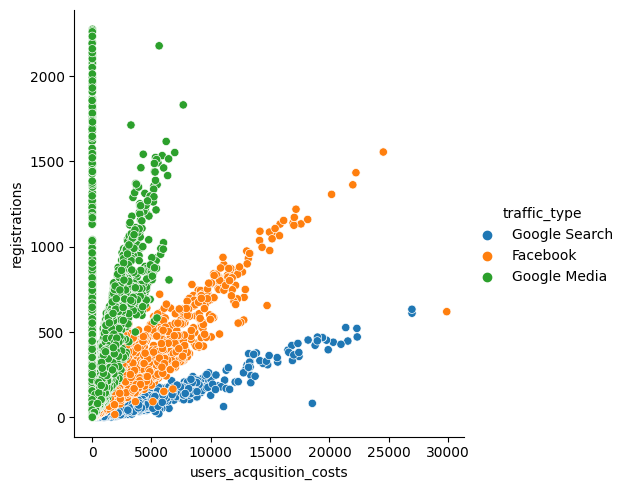

In [ ]:
sns.relplot(data=df, y="registrations", x="users_acqusition_costs", hue="traffic_type")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

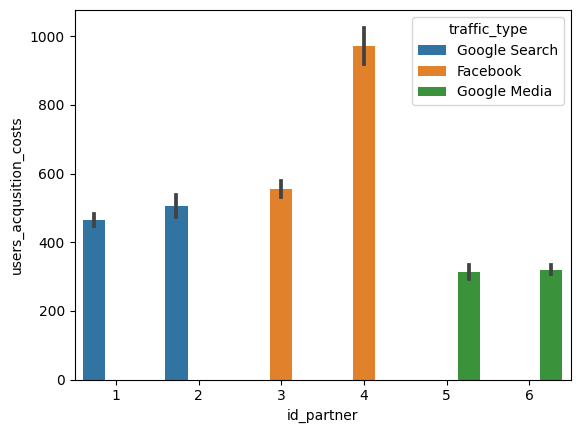

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="traffic_type")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

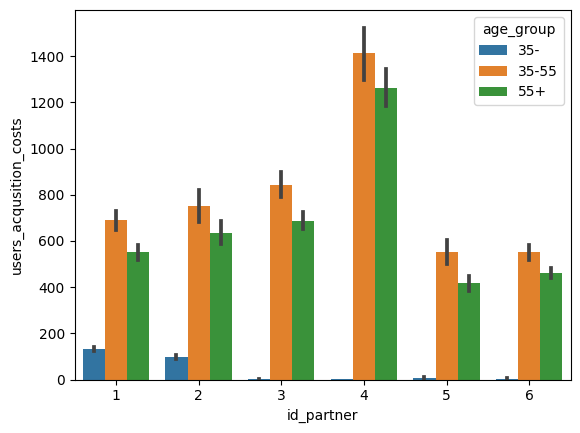

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="age_group")

<Axes: xlabel='id_partner', ylabel='users_acqusition_costs'>

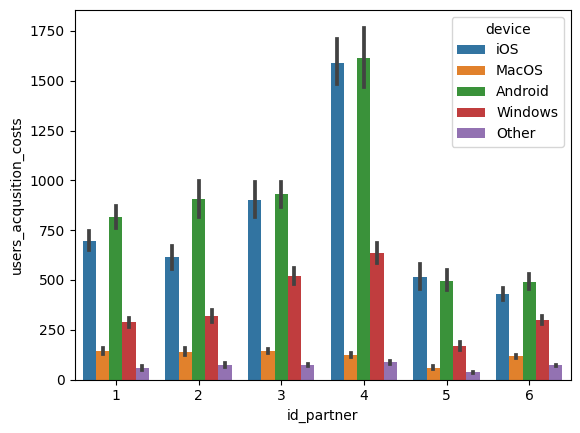

In [ ]:
sns.barplot(data=df, x="id_partner", y="users_acqusition_costs", hue="device")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48246 entries, 0 to 48247
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   registration_date       48246 non-null  object 
 1   traffic_type            48246 non-null  object 
 2   id_partner              48246 non-null  int64  
 3   age_group               48246 non-null  object 
 4   device                  48246 non-null  object 
 5   country_tier            48246 non-null  object 
 6   registrations           48246 non-null  int64  
 7   users_acqusition_costs  48246 non-null  float64
 8   revenue_7_days          48246 non-null  float64
 9   logins_1_lt             48246 non-null  int64  
 10  logins_3_lt             48246 non-null  int64  
 11  logins_7_lt             48246 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.8+ MB


In [ ]:
sns.heatmap(data=df.drop(['registration_date', 'traffic_type', 'age_group', 'device', 'country_tier', ], axis=1), annot=True)

<Axes: >

Error in callback <function flush_figures at 0x168f01bd0> (for post_execute):


KeyboardInterrupt: 